# Classification de photos de légumes

Todo:
- Mettre en place le principe d'extraction des données d'un modèle dejà entrainé.

## Problèmatique

Le projet consiste à obtenir un modèle capable de classer une photo de légume.<br />

## Les données

Les données utilisées pour ce projet proviennent d'un dataset trouvé sur Kaggle.<br />
Source : https://www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/data<br />
Le dataset a été téléchargé à la main au préalable, puis déposé dans le dossier resources.

## Modules

In [1]:
import nnz

w = nnz.Workspace()
project = w.add_project(name="legume-classifier", type=nnz.PROJECT_TYPE_NN_CLASSIFIER)

2024-06-26 15:10:20.908500: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-26 15:10:21.655274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Création des datasets
On dispatche l'ensemble des images en plusieurs dataset (train, validation, test) et on applique une augmentation de données uniquement sur les images d'entraînement.

Une fois exécuté, plusieurs fichiers .h5 sont créés dans le but d'éviter de reproduire cette étape.

In [2]:
# datasets, path_dir = project.split_images_to_sets_folders(
# "./resources/classes", "./resources",
# verbose=0,
# size_train=0.6,
# size_val=0.15,
# size_test=0.25,
# resize=(128,128),
# augmentation_data={'shuffle' : True, 'count_new_image' : 2, 'count_augmentation_per_image' : 3}
# )

In [3]:
# X_train, y_train, X_val, y_val, X_test, y_test = datasets

In [4]:
# Chargement depuis le répertoire contenant les datasets h5
X_train, y_train, X_val, y_val, X_test, y_test = project.read_h5_datasets(path_dir="./resources/datasets/2024_06_25_21_32_09/")

Visualisation de la répartition des images des datasets en fonctions des classes.

In [5]:
project.get_classes()

class  indice  count_train  count_val  count_test
0   Bitter_Gourd       0         2520        210         350
1    Cauliflower       1         2520        210         350
2         Papaya       2         2520        210         350
3         Tomato       3         2520        210         350
4        Brinjal       4         2520        210         350
5         Carrot       5         2520        210         350
6       Capsicum       6         2520        210         350
7         Potato       7         2520        210         350
8           Bean       8         2520        210         350
9   Bottle_Gourd       9         2520        210         350
10      Cucumber      10         2520        210         350
11      Broccoli      11         2520        210         350
12       Cabbage      12         2520        210         350
13       Pumpkin      13         2520        210         350
14        Radish      14         2520        210         350

## Initialisation des observations et des labels

In [6]:
labels = project.get_classes()['class']
print("\nLes labels :")
labels


Les labels :


0     Bitter_Gourd
1      Cauliflower
2           Papaya
3           Tomato
4          Brinjal
5           Carrot
6         Capsicum
7           Potato
8             Bean
9     Bottle_Gourd
10        Cucumber
11        Broccoli
12         Cabbage
13         Pumpkin
14          Radish
Name: class, dtype: object

## Visualisation des 10 premières images de chaque set

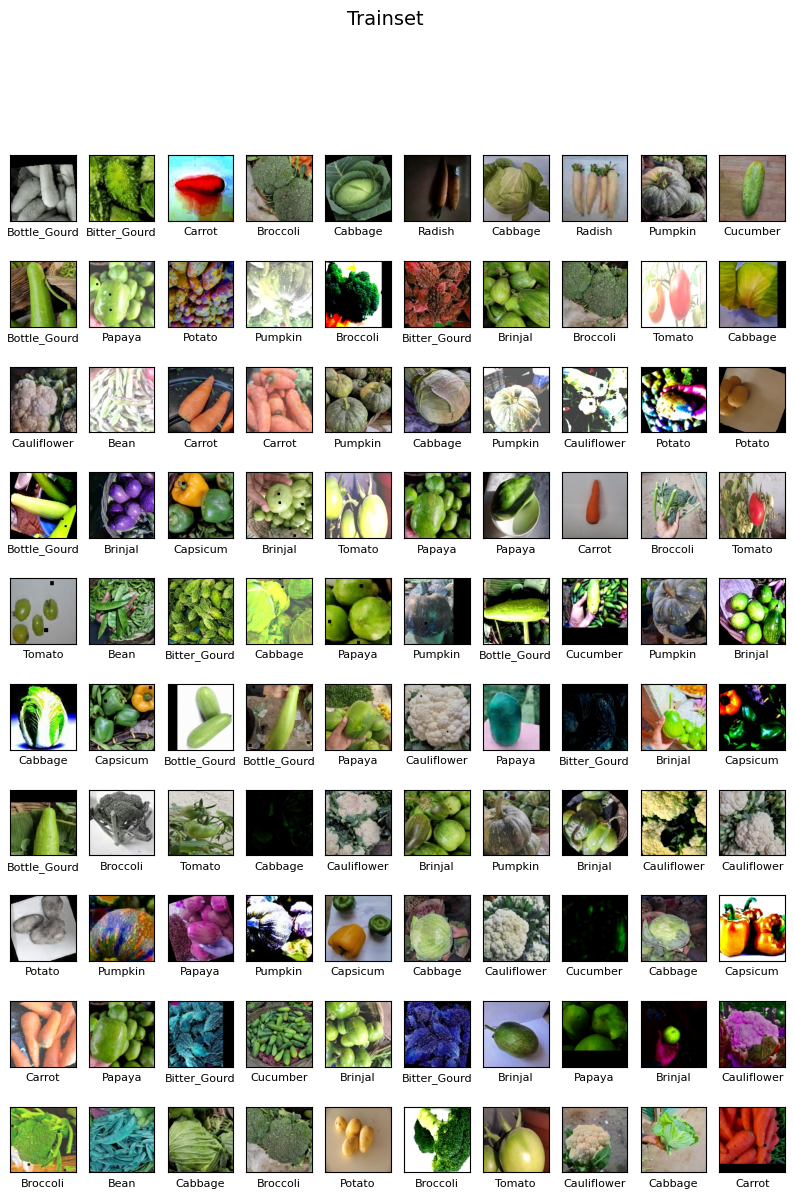

In [7]:
project.show_images(X_train, y=y_train, title="Trainset", classes=labels, limit=100)

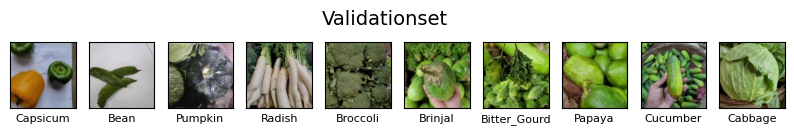

In [8]:
project.show_images(X_val, y=y_val, title="Validationset", classes=labels)

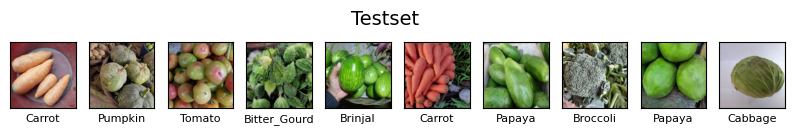

In [9]:
project.show_images(X_test, y=y_test, title="Testset", classes=labels)

## Création du modèle

In [10]:
num_classes = len(labels)

inputs = nnz.tensorflow.keras.layers.Input(shape=(128,128,3) )

x = nnz.tensorflow.keras.layers.Conv2D(32, (3,3),  activation='relu')(inputs)
x = nnz.tensorflow.keras.layers.BatchNormalization()(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Conv2D(64, (3,3),  activation='relu')(x)
x = nnz.tensorflow.keras.layers.BatchNormalization()(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Conv2D(128, (3,3),  activation='relu')(x)
x = nnz.tensorflow.keras.layers.BatchNormalization()(x)
x = nnz.tensorflow.keras.layers.MaxPooling2D((2,2))(x)
x = nnz.tensorflow.keras.layers.Dropout(0.2)(x)

x = nnz.tensorflow.keras.layers.Flatten()(x)
x = nnz.tensorflow.keras.layers.Dropout(0.5)(x)
x = nnz.tensorflow.keras.layers.Dense(512, activation='relu')(x)


output = nnz.tensorflow.keras.layers.Dense(num_classes, activation="softmax")(x)

model = nnz.tensorflow.keras.models.Model(inputs,output)
model.summary()

2024-06-26 15:10:37.755282: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 15:10:37.755898: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,947,407 (49.39 MB)

 Trainable params: 12,946,959 (49.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entraînement

In [12]:
import gc
gc.collect()
# nnz.torch.cuda.empty_cache()

name_model = 'test'

# history = project.fit_model(model, X_train, y_train, X_val, y_val, name=name_model, epochs=10, batch_size=64)

## Chargement du modèle et score

In [22]:
model = project.load_model(name_model)
score = model.evaluate(X_test, y_test, verbose=1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9646 - loss: 0.1145


## Visualisation de l'historique d'apprentissage

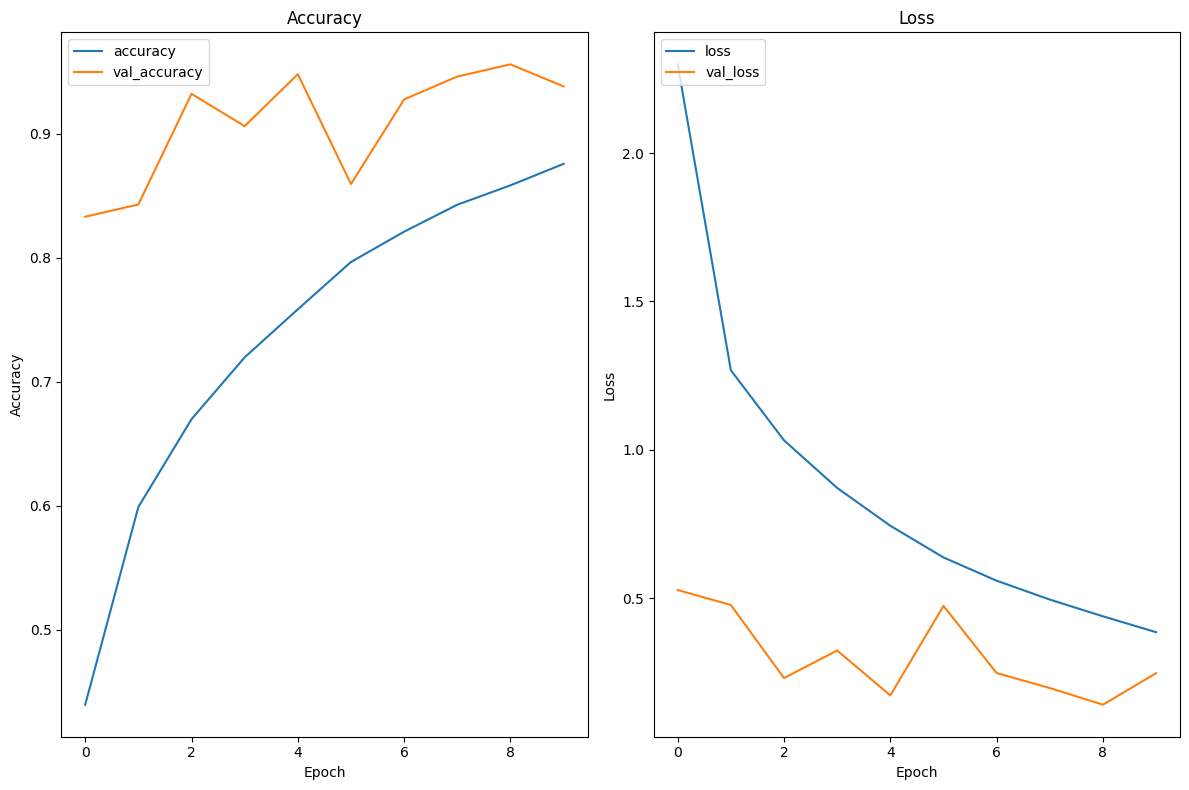

In [23]:
project.show_metrics(name=name_model)

## Predictions

In [24]:
y_pred    = project.model_get_predict_max(model, X_test, verbose=1)

165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step


## Visualisation des prédictions

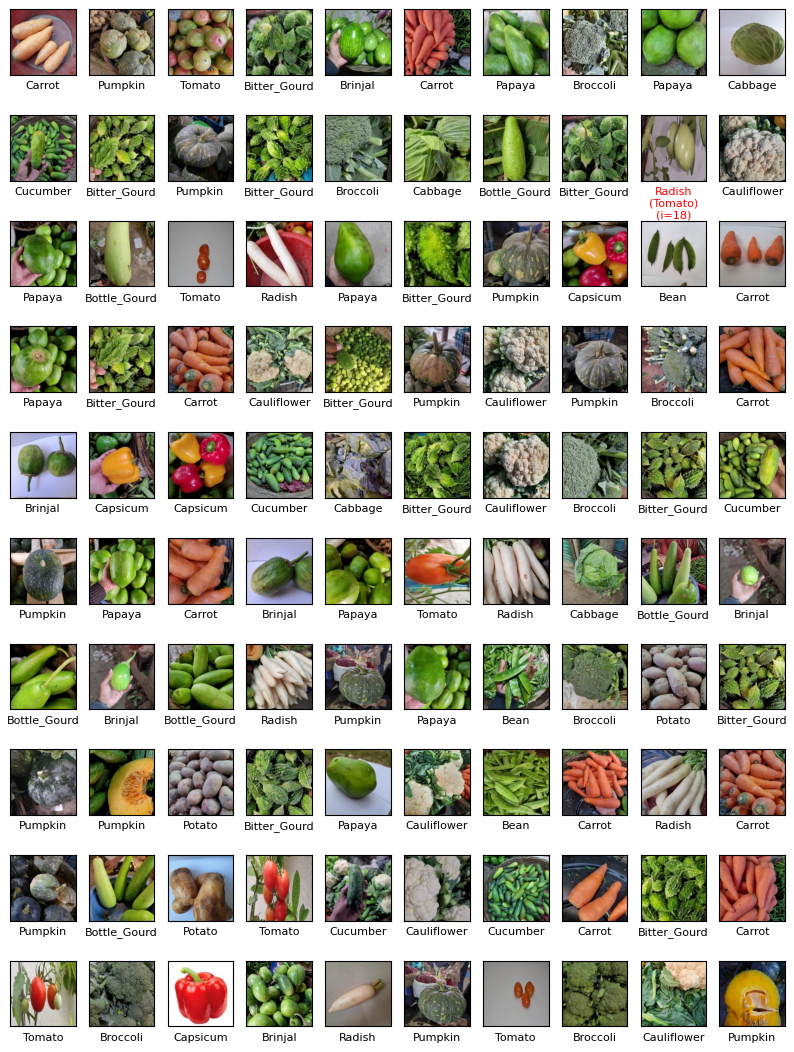

In [25]:
project.show_images(X_test, y=y_test, indices=range(0,100), y_pred=y_pred, classes=labels, limit=100)

## Analyse de la matrice de confusion

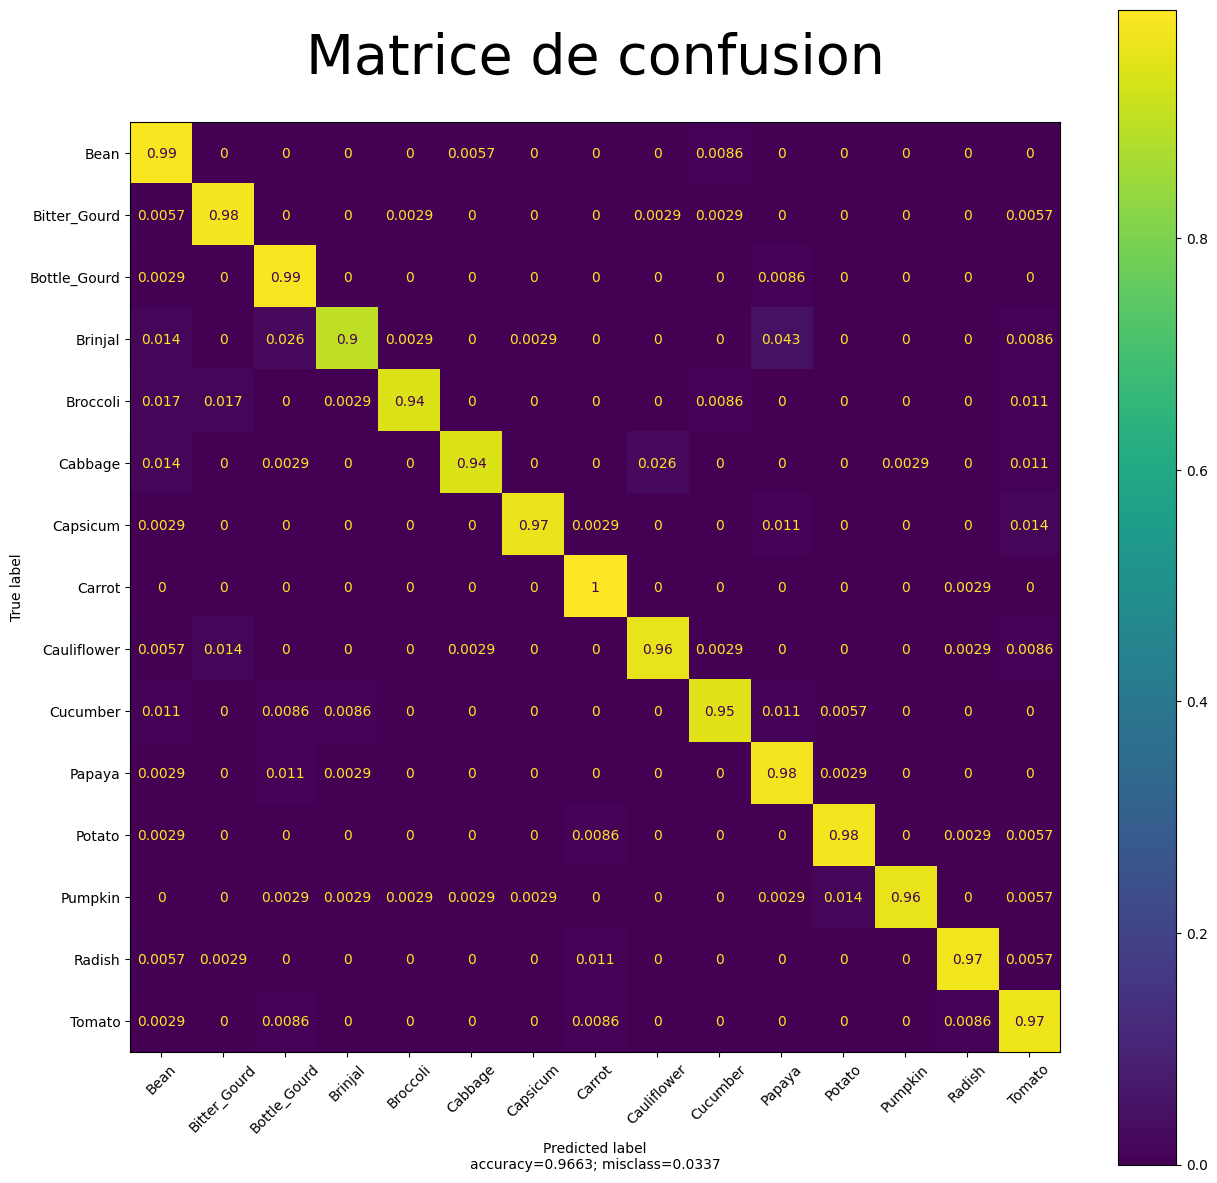

accuracy  precision    recall        f1
Bitter_Gourd  0.966286   0.966197  0.980000  0.973050
Cauliflower   0.966286   0.971182  0.962857  0.967001
Papaya        0.966286   0.927027  0.980000  0.952778
Tomato        0.966286   0.926431  0.971429  0.948396
Brinjal       0.966286   0.981366  0.902857  0.940476
Carrot        0.966286   0.969444  0.997143  0.983099
Capsicum      0.966286   0.994135  0.968571  0.981187
Potato        0.966286   0.977208  0.980000  0.978602
Bean          0.966286   0.917553  0.985714  0.950413
Bottle_Gourd  0.966286   0.942779  0.988571  0.965132
Cucumber      0.966286   0.976608  0.954286  0.965318
Broccoli      0.966286   0.990991  0.942857  0.966325
Cabbage       0.966286   0.988024  0.942857  0.964912
Pumpkin       0.966286   0.997041  0.962857  0.979651
Radish        0.966286   0.982709  0.974286  0.978479

In [26]:
project.confusion_matrix(y_test, y_pred, labels)

## Visualisation des éléments en erreurs

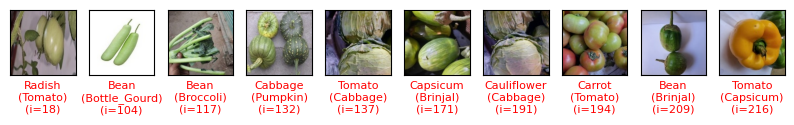

Nombre total d'erreur : 177 / 5250 ( 3.37 % ) 


In [27]:
errors_indexes = project.show_predictions_errors(X_test, y_test , y_pred, classes=labels)

## Visualisation des couches d'activation du modèle

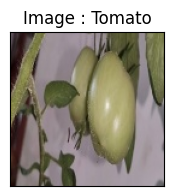

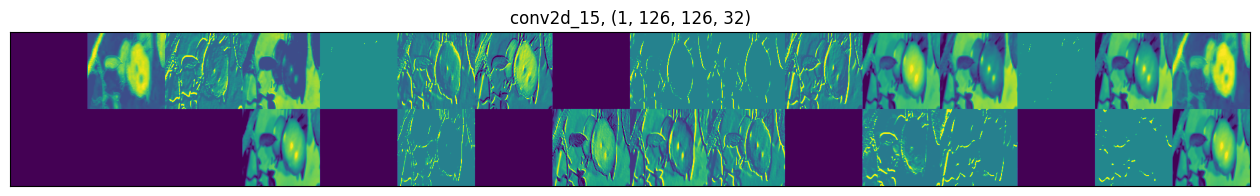

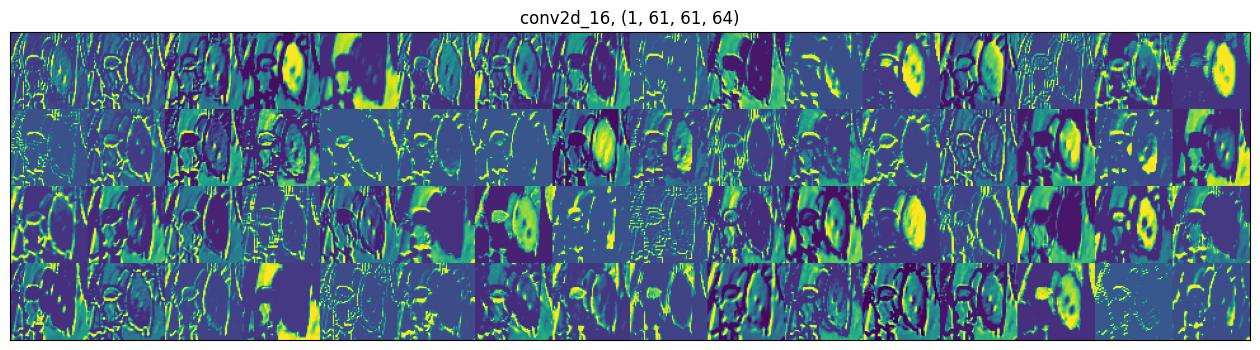

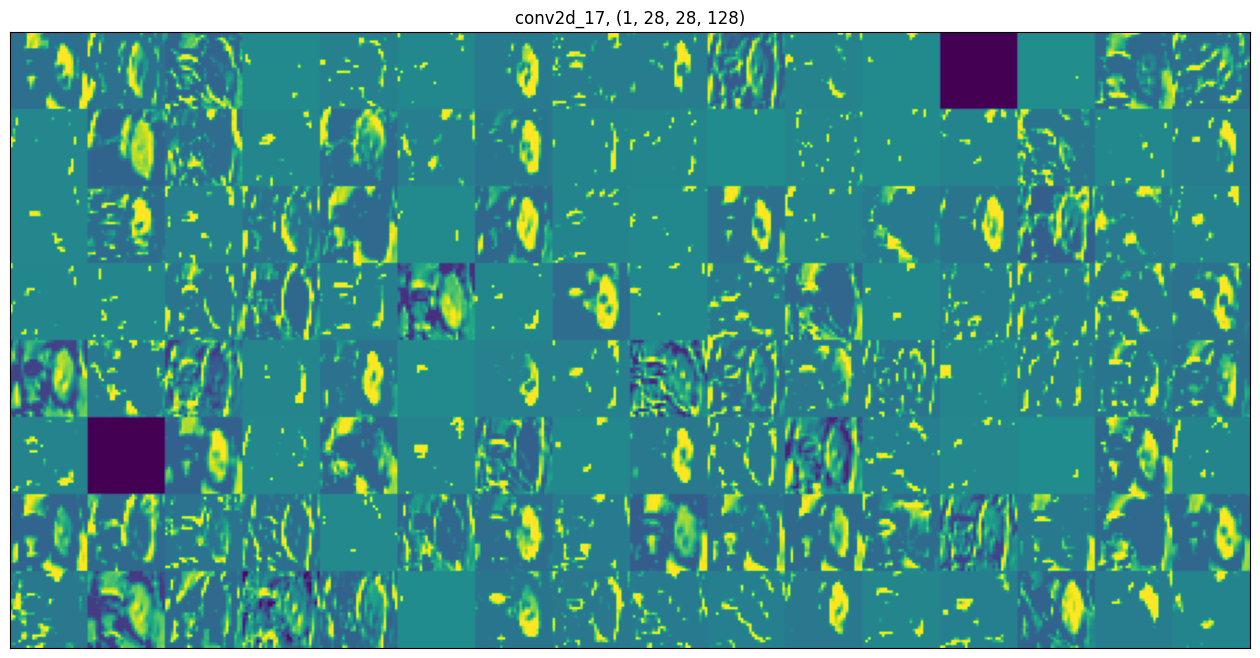

         classe     score
0        Radish  0.821478
1        Tomato  0.168528
2  Bottle_Gourd  0.008646
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


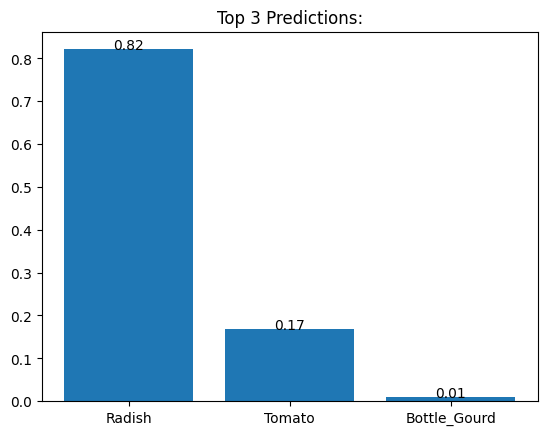

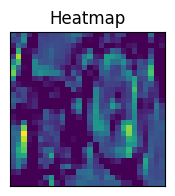

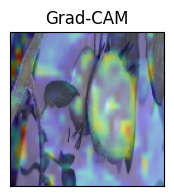

In [28]:
project.show_infos_predictions(model=model, X=X_test, y= y_test, labels=labels, indexes=errors_indexes, limit=0, alpha=0.4)